In [8]:
import sys
sys.path.append(".")
sys.path.append("..")
import os
import gensim
import numpy as np
import factor_rotation as fr
import pandas as pd

def load_word2vec_model():
    print('loading the model...')
    model = gensim.models.KeyedVectors.load_word2vec_format(MODEL_FILE, binary=False)
    print('pre-trained word2vec model loaded...')
    return model


def export_numpy_array(filename, np_array):
    print('exporting the array (' + filename + ') ...')
    np.save(SAVE_PATH + filename, np_array)


def unrotated_reps(model):
    sampled_reps = []; sampled_words = []
    for word in list(model.vocab.keys()):
        if type(word) is not str:
            word = str(word, encoding='utf-8')
        sampled_reps.append(model[word])
        sampled_words.append(word)
    sampled_reps = np.array(sampled_reps)
    sampled_words = np.array(sampled_words)
    print('converting word2vec embeddings to np_array')
    return sampled_reps, sampled_words


def varimax(unrotated):
    print('starting varimax rotation...')
    return fr.rotate_factors(unrotated, 'varimax_CF')


def parsimony(unrotated):
    print('starting factor parsimony rotation...')
    return fr.rotate_factors(unrotated, 'parsimony')


def parsimax(unrotated):
    print('starting factor parsimax rotation...')
    return fr.rotate_factors(unrotated, 'parsimax')


def quartimax(unrotated):
    print('starting factor quartimax rotation...')
    return fr.rotate_factors(unrotated, 'quartimax_CF')


def create_rotated_vec():
    model = load_word2vec_model()
    unrotated, word_list = unrotated_reps(model)
    
    word_list = pd.DataFrame(word_list)
    word_list.to_csv(os.path.join(SAVE_PATH,"word_list.csv"))

    del model
    del word_list

    print('rescaling...')
    scale = .01
    unrotated *= scale
    print(np.max(unrotated))
    print(np.min(unrotated))
    

    print('start rotating...')
    mat_L, mat_T, *_ = method_dic[method_name](unrotated)
    export_numpy_array('{}_axis.npy'.format(method_name), mat_T)
    export_numpy_array('{}_rotated.npy'.format(method_name), mat_L)

In [9]:
MODEL_FILE = '../japanese-wikipedia-200dimension/entity_vector.model.txt'
SAVE_PATH = '../japanese-wikipedia-200dimension/'
method_dic = {"varimax": varimax, "quartimax": quartimax, "parsimony": parsimony, "parsimax":parsimax}
method_name = "parsimax"

create_rotated_vec()

loading the model...
pre-trained word2vec model loaded...
converting word2vec embeddings to np_array
rescaling...
0.106313
-0.0961025
start rotating...
starting factor parsimax rotation...
exporting the array (parsimax_axis.npy) ...
exporting the array (parsimax_rotated.npy) ...


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)
axis = np.load('../japanese-wikipedia-200dimension/parsimax_axis.npy')
rotated = np.load("../japanese-wikipedia-200dimension/parsimax_rotated.npy")
word_list = pd.read_csv("../japanese-wikipedia-200dimension/word_list.csv")
word_list = list(word_list.iloc[:,1])
np.savetxt('../japanese-wikipedia-200dimension/rotated.csv',rotated,delimiter=',')

In [11]:
df = pd.DataFrame(rotated)
df.index = word_list

In [16]:
from tqdm import tqdm_notebook as tqdm
result = []
for i in tqdm(df.columns):
    df.sort_values(i,ascending=False,inplace=True)
    top = df.head(10).index
    result.append(top)

In [17]:
result_df = pd.DataFrame(result)

In [24]:
result_df.to_csv("../japanese-wikipedia-200dimension/top10result.csv")

In [25]:
result_df

,0,1,2,3,4,5,6,7,8,9
0,去っ,軍,機会,なっ,院,攻略,旨,作,艦隊,離れ
1,[字],[郡庁所在地],[村],[郡],背番号,[諱],す,世,[市町村合併],なかっ
2,棄権,振興,党,選手,汽船,選手団,きょうか,す,結ぶ,リーグ
3,隻,校,勝,冊,",",輌,人員,ヶ月,連勝,学年
4,制,[平成],定員,さ,[元禄],以内,中1,[享保],人員,～
5,発売,リリース,視聴率,開局,ノミネート,投票率,タイトル,『,[視聴率],放送
6,メーカー,ヒット,よう,売れ,届か,感度,高価,製品,プレイヤー,被害
7,王座,懲役,打率,[懲役],連続,[リングネーム],金メダル,[大正],USS,ブランド
8,7年,込め,8年,称え,13年,分け,名付け,14年,9年,12年
9,結ん,連絡,一覧,悪化,愛称,歴任,引き継い,れる,結ぶ,記す


In [20]:
plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定

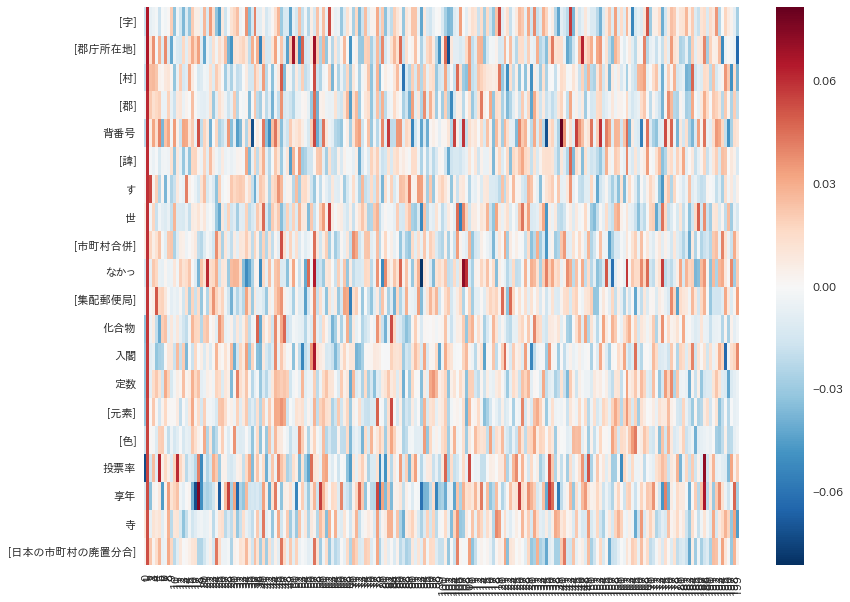

In [23]:
#地域の場所など
df.sort_values(1,ascending=False,inplace=True)
plt.figure(figsize=(12, 9))
sns.heatmap(df.head(20))

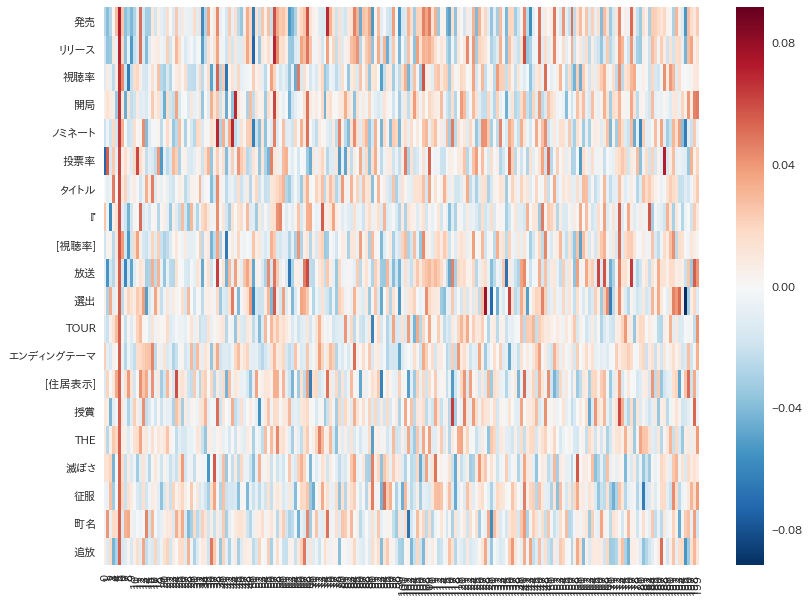

In [26]:
#発売・リリース・視聴率...populism的
df.sort_values(5,ascending=False,inplace=True)
plt.figure(figsize=(12, 9))
sns.heatmap(df.head(20))

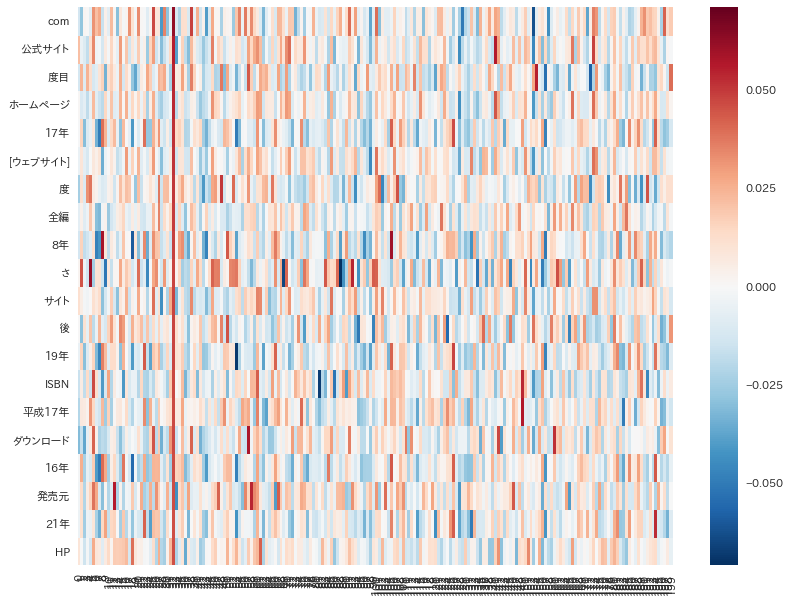

In [27]:
#ウェブサイト
df.sort_values(32,ascending=False,inplace=True)
plt.figure(figsize=(12, 9))
sns.heatmap(df.head(20))

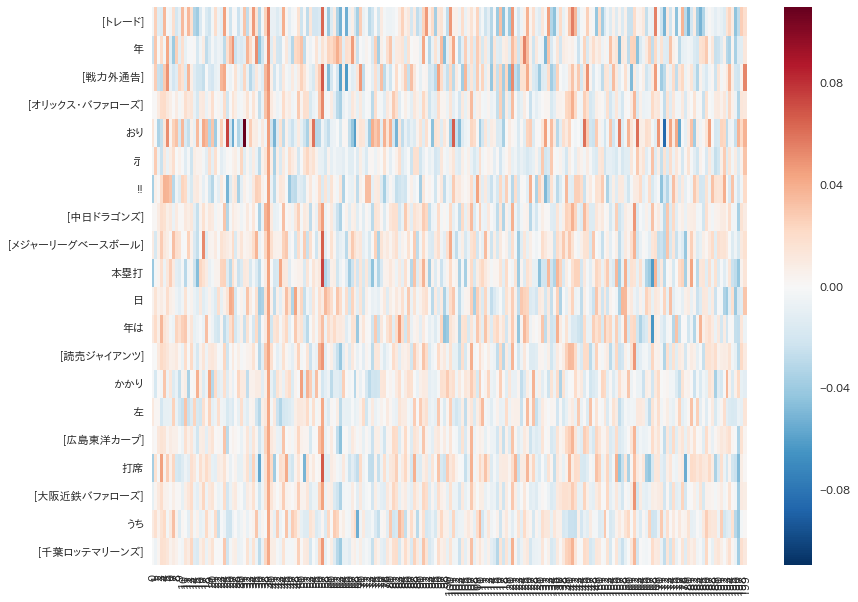

In [28]:
#野球
df.sort_values(39,ascending=False,inplace=True)
plt.figure(figsize=(12, 9))
sns.heatmap(df.head(20))

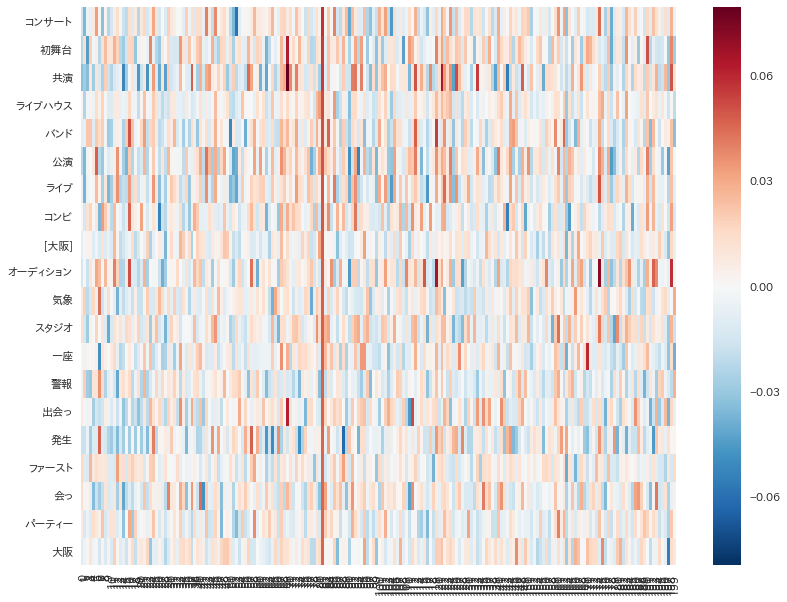

In [29]:
#ライブ
df.sort_values(81,ascending=False,inplace=True)
plt.figure(figsize=(12, 9))
sns.heatmap(df.head(20))

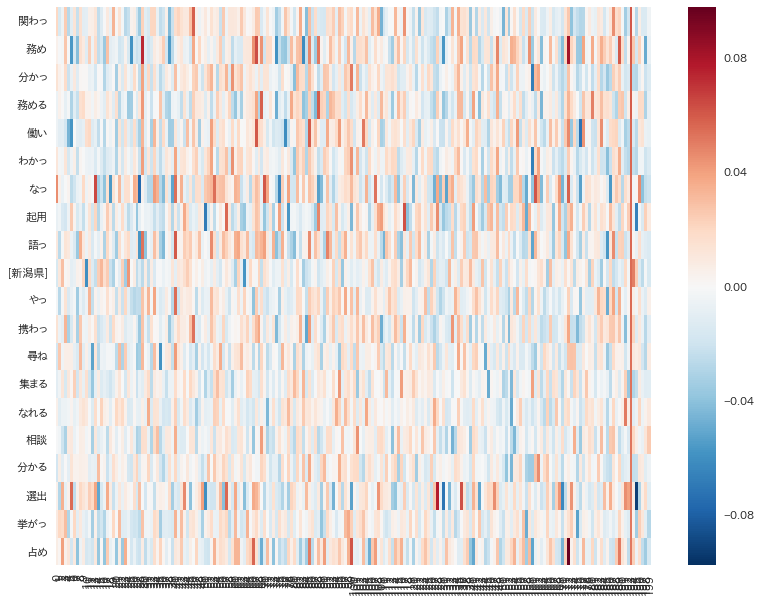

In [30]:
#関わる
df.sort_values(193,ascending=False,inplace=True)
plt.figure(figsize=(12, 9))
sns.heatmap(df.head(20))